<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 11 グラフを描く
# Section 11-1 基本的なグラフの書き方

### データの可視化について
- データ可視化は、データの傾向やパターン、関係性を視覚的に理解しやすくするために非常に重要です。
- 特に大量のデータを扱う場合、その全体像を把握するのは困難ですが、適切な可視化により、それが可能になります。

### matplotlibとは
<img src="image/matplotlib.svg">

- Pythonのmatplotlibは、データ可視化を実現するための強力なツールです。
- 折れ線グラフ、棒グラフ、散布図、ヒストグラムなど、さまざまな種類のグラフを描くことが可能で、またカスタマイズの自由度が高いのも特徴です。

### はじめてみよう
- 今回の講義では、このmatplotlibを使ったデータ可視化の基本について学んでいきます。

## 参考サイト
### [【Python早見表】Matplotlib: グラフの描画](https://chokkan.github.io/python/18plot.html)
### [【Python入門】Matplotlibライブラリ](https://utokyo-ipp.github.io/appendix/5-matplotlib.html)

# ワクチン接種データの読み込みとデータ加工
- グラフの表示に使用するデータを読み込みます

### 00. 定数の定義
- データファイルパスを定義しておきます
- データ読み込みの際にご使用してください。修正は不要です

In [1]:
# データファイルパス定義
PREFECTURES_PATH = "./data/prefectures.txt"
VACCINATION_PATH = "./data/vaccination.txt"

### 01. 都道府県データの読み込み
1. GoogleDriveをマウントしましょう
  - 第６回の授業で行ったようにショートカットを作成しましょう
  - ショートカット先は採点する先生が読み込み可能な共有ドライブで作成してください。
  - GoogleDriveをマウント後、データが読み込み可能なようにカレントディレクトリを変更してください。

1. ./data/prefectures.txt を読み込みましょう
  - １行ずつ空白区切りで都道府県IDと都道府県名が定義されているため、辞書型で読み込みましょう
  - 読み込んだデータは prefectures_dict という辞書型の変数に格納してください。

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install japanize_matplotlib

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [2]:
# ファイルを読み込みながら辞書型で取得
prefectures_dict = {} # この辞書型の変数に格納する形でプログラムを作成してください
with open(PREFECTURES_PATH, mode="r", encoding="utf_8") as f:
    prefectures_all = f.readlines()
    for prefecture1 in prefectures_all:
        prefecture_id, name = prefecture1.split()
        prefectures_dict[int(prefecture_id)] = name

### 02. 読み込んだ辞書型の変数を表示
- 変数を表示するだけのプログラムを書いておきますので、プログラムを修正せずにIDと名前が出力されれば正解です
  - 都道府県IDはこの時点でintに変換しておきましょう

In [3]:
prefectures_dict

{1: '北海道',
 2: '青森県',
 3: '岩手県',
 4: '宮城県',
 5: '秋田県',
 6: '山形県',
 7: '福島県',
 8: '茨城県',
 9: '栃木県',
 10: '群馬県',
 11: '埼玉県',
 12: '千葉県',
 13: '東京都',
 14: '神奈川県',
 15: '新潟県',
 16: '富山県',
 17: '石川県',
 18: '福井県',
 19: '山梨県',
 20: '長野県',
 21: '岐阜県',
 22: '静岡県',
 23: '愛知県',
 24: '三重県',
 25: '滋賀県',
 26: '京都府',
 27: '大阪府',
 28: '兵庫県',
 29: '奈良県',
 30: '和歌山県',
 31: '鳥取県',
 32: '島根県',
 33: '岡山県',
 34: '広島県',
 35: '山口県',
 36: '徳島県',
 37: '香川県',
 38: '愛媛県',
 39: '高知県',
 40: '福岡県',
 41: '佐賀県',
 42: '長崎県',
 43: '熊本県',
 44: '大分県',
 45: '宮崎県',
 46: '鹿児島県',
 47: '沖縄県'}

### 03. ワクチン接種データクラスの定義
1. Vaccinationのクラス定義
  - 以下のインスタンス変数を持つクラスを定義しましょう
    - day  --- 日付
    - prefecture_name  --- 都道府県名
    - count  --- ワクチン接種数

In [4]:
class Vaccination:
    def __init__(self, day, prefecture_id, count):
        self.day = day
        self.prefecture_name = prefectures_dict[prefecture_id]
        self.count = count

### 04. ワクチン接種データクラスの表示
- インスタンス変数を表示するだけのプログラムを書いておきますので、プログラムを修正せずにクラス定義が表示されれば正解です
  - 都道府県IDを指定して、都道府県名に変換して取得しておく点に気をつけましょう

In [5]:
vaccination1 = Vaccination("2021-04-12", 1,116) # 日付(2021-04-12)、北海道(都道府県ID＝1)、接種数(116件)
print(vaccination1.day)
print(vaccination1.prefecture_name)
print(vaccination1.count)

2021-04-12
北海道
116


### 05. ワクチン接種データの読み込み
1. GoogleDriveから ./data/vaccination.txt を読み込みましょう
  - １行ずつ空白区切りで日付、都道府県ID、ワクチン接種数が定義されているため、Vaccinationクラスのインスタンスに読み込みましょう
  - 読み込んだVaccinationクラスのインスタンスは vaccination_list というリスト型の変数に格納してください。

In [6]:
# ファイルを読み込みながらVaccinationクラスをリストに取得
vaccination_list = [] # 読み込んだVaccinationクラスのインスタンスはこのリスト型の変数に全て格納してください。
with open(VACCINATION_PATH, mode="r", encoding="utf_8") as f:
    vaccination_all = f.readlines()
    for vaccination1 in vaccination_all:
        day, prefecture_id, count = vaccination1.split()
        vaccination_list.append(Vaccination(day, int(prefecture_id), int(count)))

### 06. ワクチン接種データの表示
- 全ワクチン接種データの先頭5件と終端5件を表示するだけのプログラムを書いておきますので、プログラムを修正せずにデータが表示されれば正解です

In [7]:
print("データ件数＝", len(vaccination_list))

for vaccination1 in vaccination_list[:5]:
    print(vaccination1.day, vaccination1.prefecture_name, vaccination1.count)

for vaccination1 in vaccination_list[-5:]:
    print(vaccination1.day, vaccination1.prefecture_name, vaccination1.count)

データ件数＝ 4760
2021-04-12 北海道 283
2021-04-12 群馬県 86
2021-04-12 埼玉県 157
2021-04-12 千葉県 18
2021-04-12 東京都 391
2021-07-22 秋田県 4810
2021-07-22 山形県 2272
2021-07-22 福島県 2716
2021-07-22 茨城県 12630
2021-07-22 栃木県 3231


### 07. ユーザー定義関数の作成
1. 日付と都道府県名を指定したらワクチン接種数を返すユーザー定義関数を作成してください
  - ユーザー定義関数名はgetVaccinationCountとします

In [8]:
def getVaccinationCount(day, prefecture_name):
    count = 0
    for vaccination1 in vaccination_list:
        if day == vaccination1.day and prefecture_name == vaccination1.prefecture_name:
            count += vaccination1.count

    return count

### 08. ユーザー定義関数の作成2
1. 都道府県名を指定したら全ての日のそれぞれのワクチン接種数を配列で返すユーザー定義関数を作成します
  - ユーザー定義関数名は getDailyVaccinationData とします

In [9]:
def getDailyVaccinationData(prefecture_name):
    result = []
    for vaccination1 in vaccination_list:
        if prefecture_name == vaccination1.prefecture_name:
            result.append(vaccination1)

    return result

# 基本的なグラフの書き方
- 沖縄県のデータで作成します。

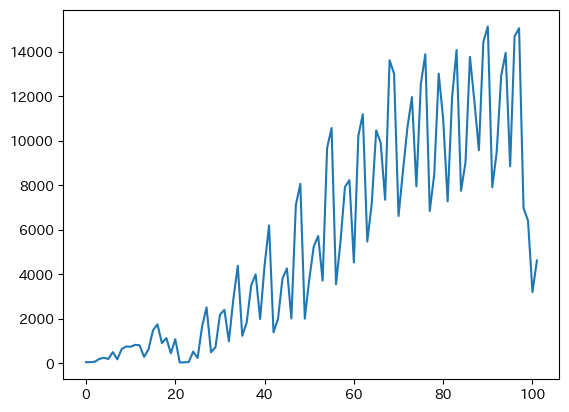

In [10]:
import matplotlib.pyplot as plt # 可視化ライブラリ
import japanize_matplotlib # matplotlibで日本語表示できない時にpipでライブラリをインストールして、有効にしてみてください

okinawa_daily_vaccination = getDailyVaccinationData("沖縄県")
okinawa_daily_count = [data.count for data in okinawa_daily_vaccination]
plt.plot(okinawa_daily_count)
plt.show()

### 説明と改善点
- X軸は要素のインデックス番号になっています。
  - だいたい数が増えていることはわかるのですが、日付が無いためわかりません。
  - X軸が日付にできると良いですね。
- パッと見何を示すグラフなのかもわかりません。
  - グラフにタイトルを付けたり、凡例を付けると良さそうです。
- 他県と比較して多いのか少ないのかもわかりません。
  - 複数のグラフを表示できるといいですね。

### グラフを描画するユーザー定義関数を作成する
- 複数のデータを表示するために、ユーザー定義関数を作って表示してみます。

In [11]:
# 特定の日付が、特定の期間内に含まれているかを判定する関数
def checkDateInPeriod(check_date, start, end):
    check_date = int(check_date.replace('-',''))
    start = int(start.replace('-',''))
    end = int(end.replace('-',''))
    return (start <= check_date <= end)

print(checkDateInPeriod('2021-05-12', '2021-04-12', '2021-07-20'))
print(checkDateInPeriod('2021-05-11', '2021-05-12', '2021-07-20'))

True
False


In [12]:
# 特定の県の特定の日付の接種数を可視化する関数
def plotVaccinationByPrefecture(prefecture_name, start_date='2021-04-12', end_date='2021-07-22', day_plot_interval=7, marker='', color=None):
    prefecture_vaccinations = []
    for vaccination1 in vaccination_list:
        if prefecture_name == vaccination1.prefecture_name:
            if checkDateInPeriod(vaccination1.day, start_date, end_date):
                prefecture_vaccinations.append(vaccination1)

    daily_count = [data.count for data in prefecture_vaccinations]
    daily_day = [data.day for data in prefecture_vaccinations]
    show_day = [day for i, day in enumerate(daily_day) if i%day_plot_interval== 0] # ある程度間隔をあけて表示するラベルを作成する。

    plt.plot(daily_day, daily_count, marker=marker, color=color, label=prefecture_name) # X軸、Y軸両方指定。マーカー、カラー、凡例も指定。
    plt.xticks(show_day, rotation=270) # 表示ラベルを1週間に1度に変更し、X軸の表示を90度回転させる。
    plt.legend(loc="upper left")

## サンプルプログラム1　沖縄県と東京都の４月のワクチン接種数を比較してみましょう

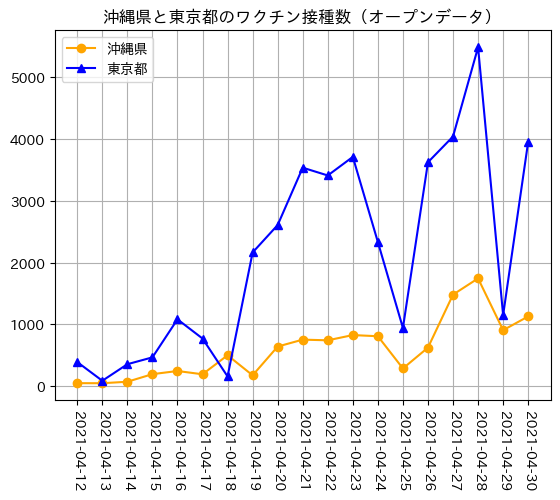

In [13]:
show_start_date = '2021-04-12' # 日付はゼロ埋めで指定すること
show_end_date = '2021-04-30' # 日付はゼロ埋めで指定すること
x_interval = 1
plotVaccinationByPrefecture("沖縄県", show_start_date, show_end_date, x_interval, 'o', 'orange') # 特定の県の特定の日付の接種数を可視化
plotVaccinationByPrefecture("東京都", show_start_date, show_end_date, x_interval, '^', 'blue') # 特定の県の特定の日付の接種数を可視化
plt.title("沖縄県と東京都のワクチン接種数（オープンデータ）") # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。
plt.grid(True) # グリッドを有効にする
plt.show() # グラフを表示

### 考察
- 日付と他の都道府県との比較がついたため、わかりやすくなりました。
  - ４月中は東京都の方が早くワクチン接種が始まったことわかります。

## 練習プログラム1　２つ以上の都道府県のワクチン接種数を比較してみましょう(2.5点)
- 比較対象にする都道府県や期間は、サンプルプログラムや授業とは違うオリジナルの組み合わせにしましょう。
- 組み合わせにあわせてグラフのタイトルも変更しましょう
- ユーザー定義関数 plotVaccinationByPrefecture() は使用してOKです。
- ２回以上グラフを可視化してもOKです。
- 最後に可視化して得られた考察をNotebookに記載してみましょう。考察は多ければ多いほどよいですが、少なくとも３つは記載してみましょう。

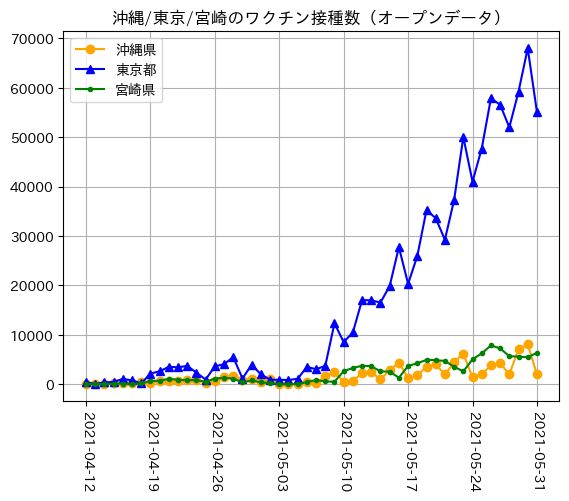

In [14]:
show_start_date = '2021-04-12'
show_end_date = '2021-05-31'
x_interval = 7
plotVaccinationByPrefecture("沖縄県", show_start_date, show_end_date, x_interval, 'o', 'orange') # 特定の県の特定の日付の接種数を可視化
plotVaccinationByPrefecture("東京都", show_start_date, show_end_date, x_interval, '^', 'blue') # 特定の県の特定の日付の接種数を可視化
plotVaccinationByPrefecture("宮崎県", show_start_date, show_end_date, x_interval, '.', 'green') # 特定の県の特定の日付の接種数を可視化
plt.title("沖縄/東京/宮崎のワクチン接種数（オープンデータ）") # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。
plt.grid(True) # グリッドを有効にする
plt.show() # グラフを表示

### 考察
- 宮崎県を加えて５月末まで可視化してみた。
  - 宮崎県は当初感染者数が少なかったため、ワクチン接種数が少なく出るか、多く出るのか興味がありました。
  - 上記の結果では、感染者数が多く、経済的影響の大きい東京都が優先的に割り当てられた可能性がありそうです。

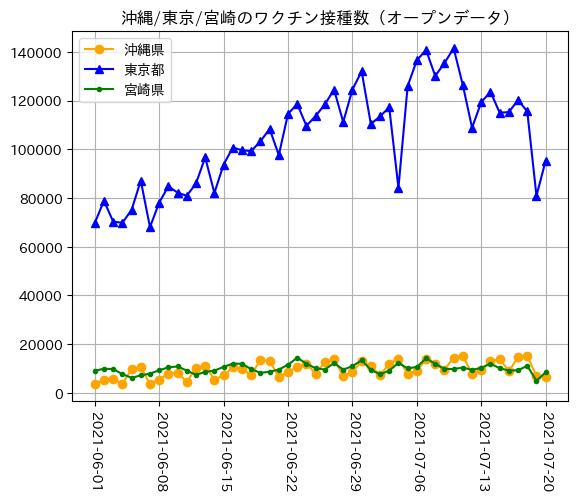

In [15]:
show_start_date = '2021-06-01'
show_end_date = '2021-07-20'
x_interval = 7
plotVaccinationByPrefecture("沖縄県", show_start_date, show_end_date, x_interval, 'o', 'orange') # 特定の県の特定の日付の接種数を可視化
plotVaccinationByPrefecture("東京都", show_start_date, show_end_date, x_interval, '^', 'blue') # 特定の県の特定の日付の接種数を可視化
plotVaccinationByPrefecture("宮崎県", show_start_date, show_end_date, x_interval, '.', 'green') # 特定の県の特定の日付の接種数を可視化
plt.title("沖縄/東京/宮崎のワクチン接種数（オープンデータ）") # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。
plt.grid(True) # グリッドを有効にする
plt.show() # グラフを表示

### 考察
- 7月まで可視化してみた。
  - 東京都が頭打ちになりました。
  - あまり変化が見られませんね。

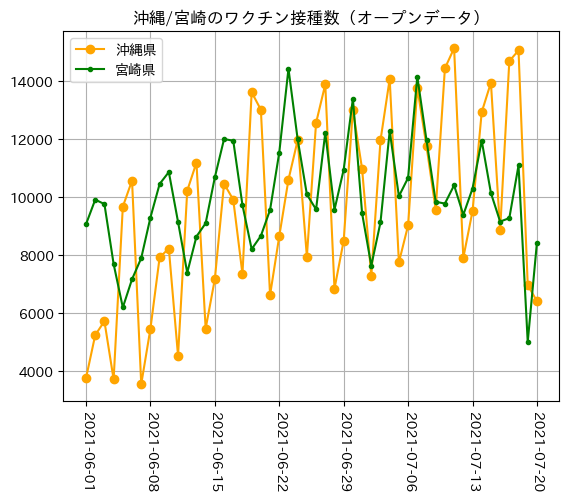

In [16]:
show_start_date = '2021-06-01'
show_end_date = '2021-07-20'
x_interval = 7
plotVaccinationByPrefecture("沖縄県", show_start_date, show_end_date, x_interval, 'o', 'orange') # 特定の県の特定の日付の接種数を可視化
plotVaccinationByPrefecture("宮崎県", show_start_date, show_end_date, x_interval, '.', 'green') # 特定の県の特定の日付の接種数を可視化
plt.title("沖縄/宮崎のワクチン接種数（オープンデータ）") # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。
plt.grid(True) # グリッドを有効にする
plt.show() # グラフを表示

### 考察
- 沖縄県と宮崎県で可視化してみました。
  - 殆ど変わらないのですが、若干、宮崎県の方が早くピークに達していますね。
  - 宮崎県（約107万人)、沖縄県(約145万人)の人口比を考慮すると、やや宮崎県の方が接種率が良かったようです。
     - 島嶼地域の多い沖縄県ではワクチン接種の体制作りも難しかったのかもしれませんね。
     - [新型コロナワクチンの接種状況](https://info.vrs.digital.go.jp/dashboard) で３回目の接種数を比較すると、宮崎県の方が16%程度高めですね。